# Mathematical Foundations of Deep Neural Networks

## Homework 3

### 2017-11362 박건도

## **Problem 1:** *3-layer MLP to fit a univariate function.*

In [1]:
import torch
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
alpha = 0.1
K = 1000
B = 128
N = 512

def f_true(x) :
    return (x-2) * np.cos(x*4)

np.random.seed(0)
X_train = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N), dtype=torch.float32)
y_train = f_true(X_train)
X_val = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N//5), dtype=torch.float32)
y_val = f_true(X_val)

train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B, shuffle=True)
test_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=B)

In [3]:
# Define model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 64, bias=True)
        self.linear2 = nn.Linear(64, 64, bias=True)
        self.linear3 = nn.Linear(64, 1, bias=True)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [4]:
# Model construction
model = MLP()
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

# Initialization
for layer in [model.linear1, model.linear2, model.linear3]:
    layer.weight.data = torch.normal(0, 1, layer.weight.shape)
    layer.bias.data = torch.full(layer.bias.shape, 0.03)

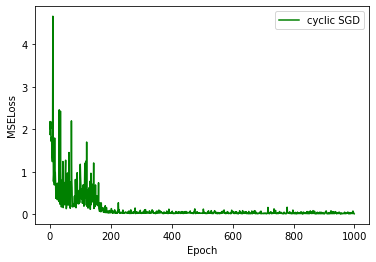

In [5]:
# Training
f_val = []

for epoch in range(K):
    for _ in range(N // B):
        for x_data, y_data in train_dataloader:
            # forward
            y_pred = model(x_data)
            # loss
            loss = loss_function(y_pred, y_data.float())

            # backward
            loss.backward()

            # update
            optimizer.step()
            optimizer.zero_grad()
    
    # save loss
    f_val.append(loss)

plt.plot(list(range(K)), f_val, color='green', label="cyclic SGD")
plt.xlabel('Epoch')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

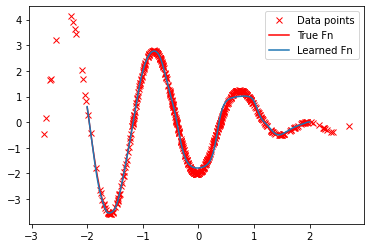

In [6]:
# Plot
with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx,f_true(xx),'r',label='True Fn')
    plt.plot(xx, model(xx),label='Learned Fn')
plt.legend()
plt.show()

## **Problem 2:** *Deep learning operates under $p \gg N$*.

In previous problem, $p = 1\times64 + 64 + 64\times64 + 64 + 64\times1 + 1 = 4353$, $N = 512$. 

In [8]:
# Generate data-set
np.random.seed(0)
X_train = torch.tensor(np.random.normal(loc = 0.0, scale = 1.0, size = N), dtype=torch.float32)
y_train = f_true(X_train) + torch.normal(0, 0.5, X_train.shape)
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B, shuffle=True)

In [9]:
# Model construction
model = MLP()
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

# Initialization
for layer in [model.linear1, model.linear2, model.linear3]:
    layer.weight.data = torch.normal(0, 1, layer.weight.shape)
    layer.bias.data = torch.full(layer.bias.shape, 0.03)

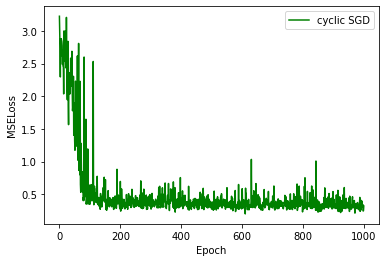

In [10]:
# Training
f_val = []

for epoch in range(K):
    for _ in range(N // B):
        for x_data, y_data in train_dataloader:
            # forward
            y_pred = model(x_data)
            # loss
            loss = loss_function(y_pred, y_data.float())

            # backward
            loss.backward()

            # update
            optimizer.step()
            optimizer.zero_grad()
    
    # save loss
    f_val.append(loss)

plt.plot(list(range(K)), f_val, color='green', label="cyclic SGD")
plt.xlabel('Epoch')
plt.ylabel('MSELoss')
plt.legend()
plt.show()

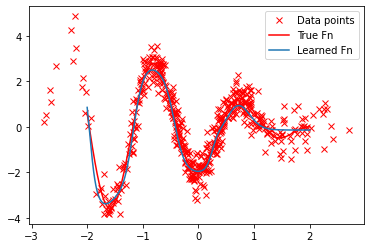

In [11]:
# Plot
with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx,f_true(xx),'r',label='True Fn')
    plt.plot(xx, model(xx),label='Learned Fn')
plt.legend()
plt.show()

## **Problem 3:** *Basic properties of the CE loss.*

![prob3](prob3.png)

## **Problem 4:** *Derivative of max.*

![prob4](prob4.png)

## **Problem 5:** *Basic properties of activation functions.*

![prob5](prob5.png)

## **Problem 6:** *Vanishing gradients.*

![prob6](prob6.png)

## **Problem 7:** *Leaky ReLU.*

![prob7](prob7.png)